# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (-1.5*f(x) + 2*f(x+h) - 0.5*f(x+2*h))/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Ошибка пропорциональна квадрату шага, что соответвует формуле

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [3]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

def deriv2(f, x, h):
    return (f(x + h) - f(x)) / h

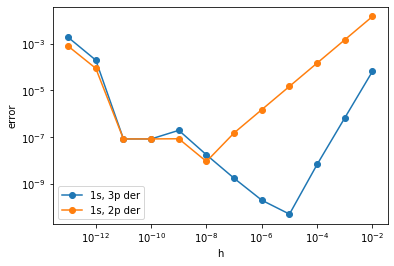

In [11]:
import numpy as np
import matplotlib.pyplot as plt
h = np.power(0.1, np.arange(2, 14))
err = []
err2 = []
for i in h:
    err.append(abs(deriv(f, 1, i) - fder(1)))
    err2.append(abs(deriv2(f, 1, i) - fder(1)))
plt.plot(h, err, '-o', label = "1s, 3p der")
plt.plot(h, err2, '-o', label = "1s, 2p der")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("h")
plt.ylabel("error")
plt.legend()
plt.show()

Видно, что оптимальные значения $h$:$\;\;\;$ ~$10^{-8}$ для двухточечной $\;\;\;$
    ~$10^{-5}$ для трехточечной

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [12]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


Сходимость линейная, так как слагаемые разложения тейлора, содержащие производные третьего и выше порядков дают ~$h$. В то время, как в первом примере слагаемое с третьей (крайней) производной давала порядок ~$h^2$

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

Будем прогонять кол-во интервалов в цикле до сходимости, поэтому нет большого смысла повторять процедуру для 2N

In [99]:
def midpoint_rule(func, a, b, eps):
    S = (b-a)*func((a+b)/2)
    for N in range(3, 100000):
        dots = np.linspace(a, b, N)
        points = (dots[1:]+dots[:-1])/2
        h = (b-a)/N
        S_new = h*np.sum(func(points))
        if abs(S_new-S)<eps:
            return S_new, N
        S = S_new
    return 0, 0

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


$$
\int_0^2\! x^3\, dx = 4
$$

Интеграл =  3.9936858682055805 кол-во разбиений =  634
Интеграл =  3.991081371301304 кол-во разбиений =  449
Интеграл =  3.989085927845029 кол-во разбиений =  367
Интеграл =  3.9874015435589154 кол-во разбиений =  318
Интеграл =  3.9858906086696853 кол-во разбиений =  284
Интеграл =  3.984585684585684 кол-во разбиений =  260
Интеграл =  3.9833679114799443 кол-во разбиений =  241
Интеграл =  3.9821825396825394 кол-во разбиений =  225
Интеграл =  3.981087364750068 кол-во разбиений =  212
Интеграл =  3.980148761144771 кол-во разбиений =  202
Интеграл =  3.9791121291448524 кол-во разбиений =  192
Интеграл =  3.978201473033975 кол-во разбиений =  184
Интеграл =  3.977336928608116 кол-во разбиений =  177
Интеграл =  3.976539387684898 кол-во разбиений =  171
Интеграл =  3.9756836659275683 кол-во разбиений =  165
Интеграл =  3.9749213836477986 кол-во разбиений =  160
Интеграл =  3.9741097612065364 кол-во разбиений =  155
Интеграл =  3.973421633554085 кол-во разбиений =  151
Интеграл =  3.97269

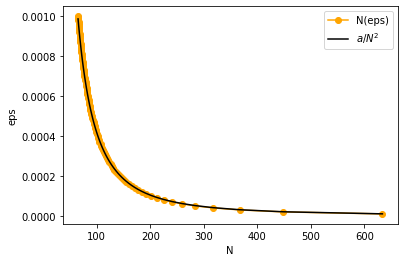

In [100]:
from scipy.optimize import curve_fit
def f1(x, a):
    return a/x**2

eps = np.linspace(1e-5, 1e-3, 100)
points = []
for i in eps:
    S, N = midpoint_rule(lambda x: x**3, 0, 2, i)
    print("Интеграл = ", S,"кол-во разбиений = ", N)
    points.append(N)
    
a, pcov = curve_fit(f1, points, eps)    
print("a = ", a)
plt.plot(points, eps, '-o', color='orange', label="N(eps)") 
plt.xlabel("N")
plt.ylabel("eps")
plt.plot(points, f1(np.asarray(points), a), label="$a/N^2$", color='black')
plt.legend()
plt.show()

Видно, как метод отлично повторяет $O(\frac{1}{N^2})$

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

Вычетаем сингулярность из данного интеграла и интегрируем отдельно:
$$\int_0^1\! \frac{1}{\sqrt{x}}\, dx = 2$$

Затем просто складываем

In [108]:
def func(x):
    return np.sin(np.sqrt(x))/x

def func_(x):
    return func(x)-np.sqrt(1/x)

print(midpoint_rule(func, 0, 1, 1e-4), "-  прямой посчет сингулярности")
print(midpoint_rule(func_, 0, 1, 1e-4), "- интеграл без сингулярности")
print("Итоговое значение:", midpoint_rule(f4, 0, 1, 1e-4)[0]+2)

(1.8475439129288769, 261) -  прямой посчет сингулярности
(-0.10461769150104429, 33) - интеграл без сингулярности
Итоговое значение: 1.8953823084989556


Что вполне неплохо, так как вольфрам выдает 1.892